<a href="https://colab.research.google.com/github/marah-ghanem/AI-ML-tasks/blob/main/20190862_20180461_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import enum

Kmeans from scratch with K=3



1.   Choose the number of clusters K.
2.   Initialize the centroids for each cluster randomly.
3.   Assign each data point to the nearest centroid.
4.   Compute the new centroids for each cluster as the mean of the assigned data points.
5.   Repeat steps 3 and 4 until the centroids no longer move.


In [ ]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum(x1-x2)**2)

In [ ]:
class KMeans:
  def __init__(self,k=3,number_of_iteration=100,max_itreation=100,plot_steps=False):
    self.k = k
    self.number_of_iteration = number_of_iteration
    self.max_itreation = max_itreation
    self.plot_steps = plot_steps
    self.num_samples = 0
    self.num_features = 0
    self.X = None
    #empty clusters
    for _ in range(self.k):
      self.clusters = []
    #centroides 
    self.centroids = []

  def predict(self,X):
    self.X = X
    self.num_samples, self.num_features = X.shape
    random_indexs_sample = np.random.choice(self.num_samples, self.k, replace=False)
    self.centroids = [X[idx] for idx in random_indexs_sample]
    #cluster optimazation
    for _ in range(self.max_itreation):
      #assign samples
      self.clusters = self._create_clusters(self.centroids)

      if self.plot_steps:
        self.plot()
      #calculate new clusters
      old_centroids = self.centroids
      self.centroids = self._get_centroids(self.clusters)

      if self._is_convereg(old_centroids,self.centroids):
        break

      if self.plot_steps:
        self.plot()

    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self ,clusters):
    labels = np.empty(self.num_samples)
    for cluster_index, cluster in enumerate(clusters):
      for sample_index in cluster :
        labels[sample_index]= cluster_index
    return labels
 
  def _create_clusters(self,centroids):
    # assigns 
    clusters =[[] for _ in range(self.k)]
    for index , sample in enumerate(self.X):
      centroid_index = self._closest_centroid(sample, centroids)
      clusters[centroid_index].append(index)
    return clusters

  def _closest_centroid(self,sample,centroids):
    #distance
    distances = [euclidean_distance(sample,point) for point in centroids]
    closest_index = np.argmin(distances)
    return closest_index
    
  
  def _get_centroids(self,clusters):
    # assign mean value of clusters to centroids
    centroids = np.zeros((self.k, self.num_features))
    for cluster_index,cluster in enumerate(clusters):
      mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_index] = mean
    return centroids


  def _is_convereg(self,old_centroids,centroids):
    #dist(old,new)
    distances = [euclidean_distance(old_centroids[i],centroids[i]) for i in range(self.k)]
    return sum(distances) == 0

  def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))
    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point,marker="x", color="black", linewidth=2)

    plt.show()

test

(150, 2)
3


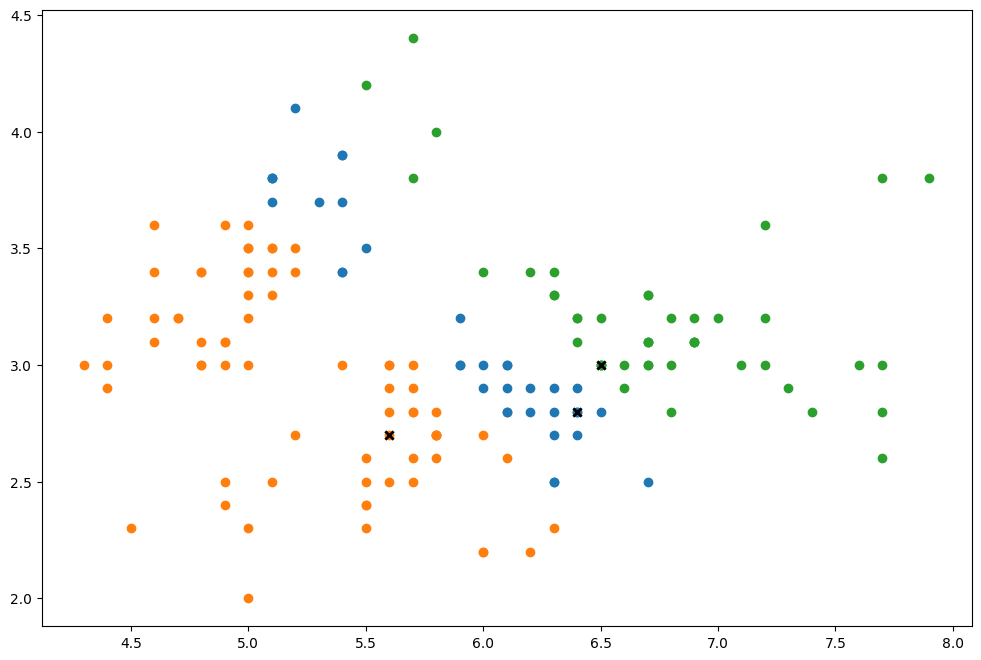

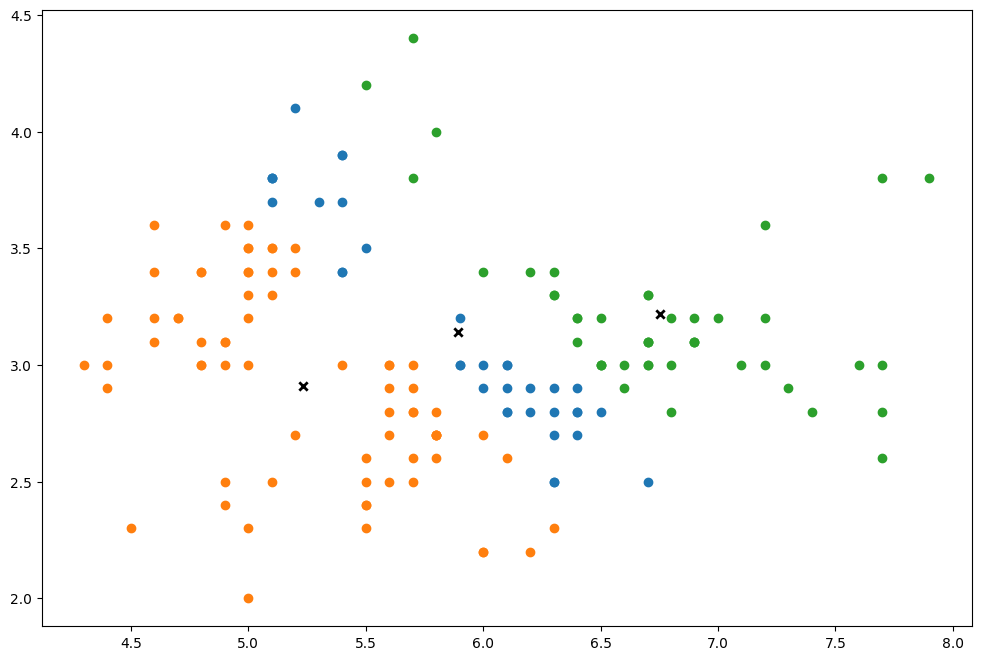

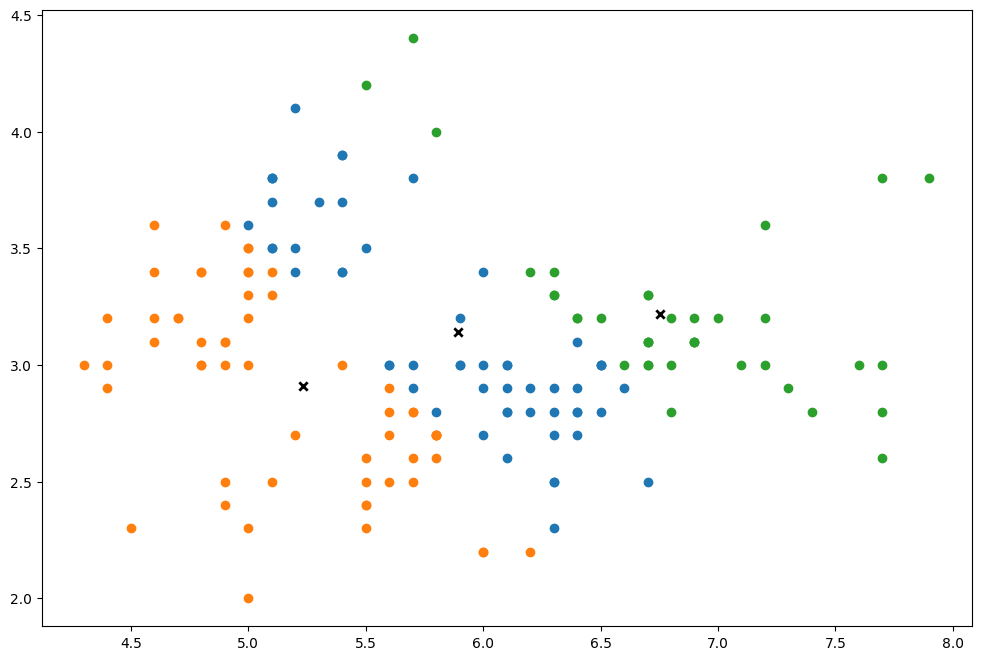

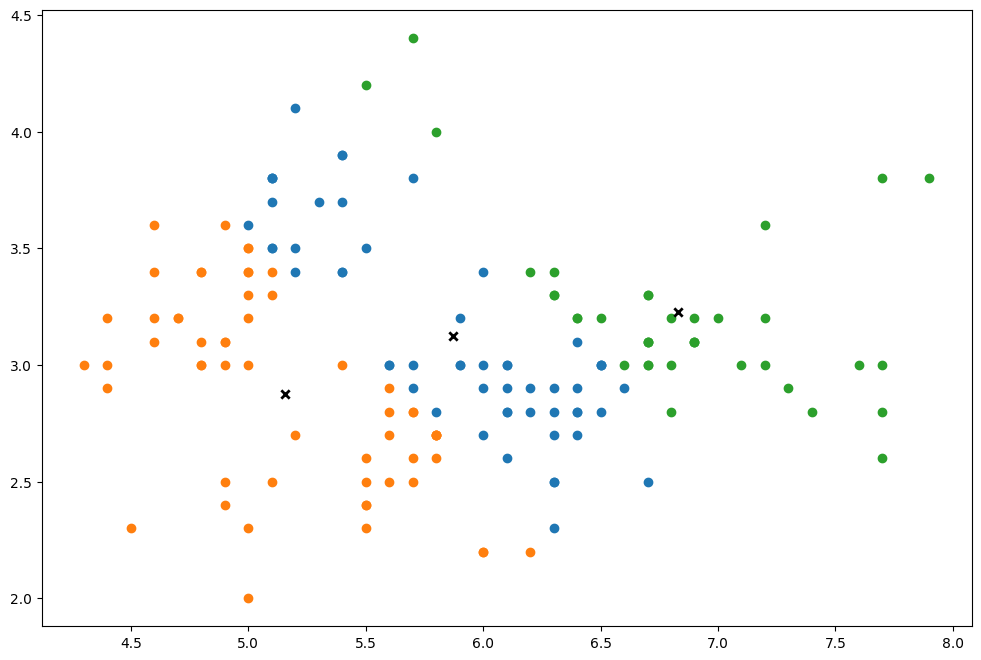

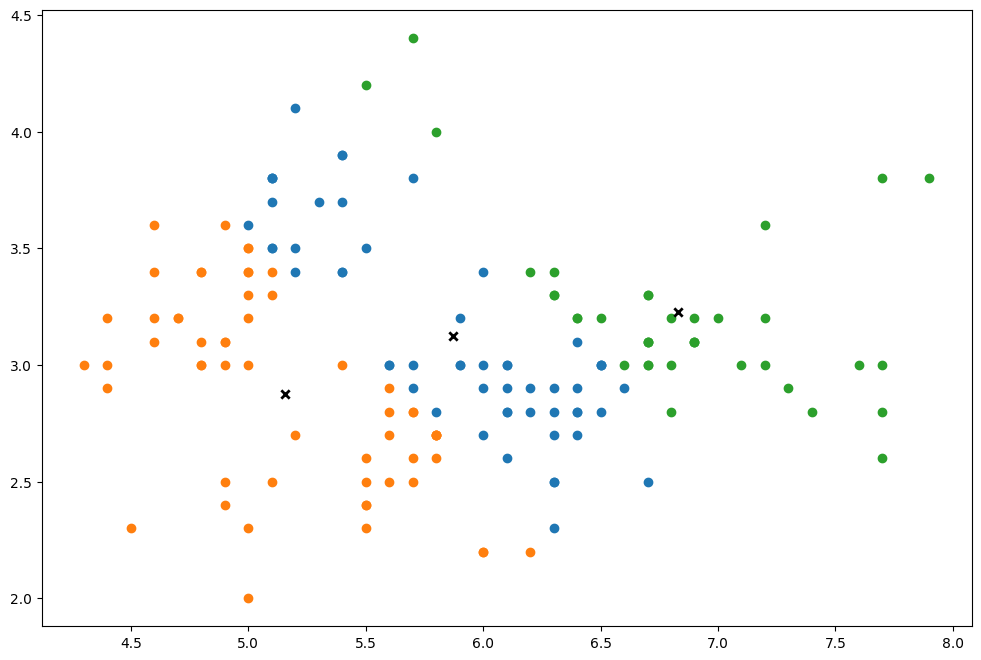

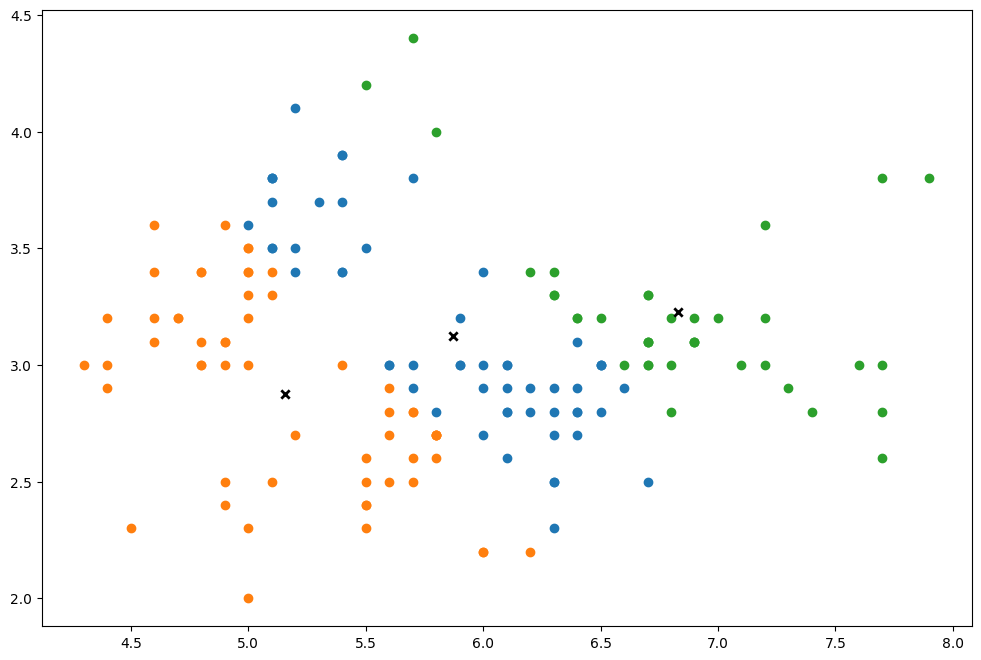

In [ ]:
if __name__ == "__main__":
  
    iris = load_iris()
    X = iris.data[:, :2]  # Using only the first two features
    y = iris.target
    print(X.shape)
    # Shuffle the data before training
    idx = np.random.permutation(len(X))
    X = X[idx]
    y = y[idx]
    clusters = len(np.unique(y))
    print(clusters)
    k = KMeans(k=clusters,max_itreation=100, plot_steps=True)
    y_pred = k.predict(X)
    k.plot()
